In [1]:
#import libraries
import numpy as np # math arrays manipulation
import pandas as pd # for data management
from matplotlib import pyplot as plt # for plot
import statsmodels.api as sm
import datetime

In [2]:
df1 = pd.read_csv('subset_1.csv',chunksize = 10000000)
for data in df1:
    print(data.info())
    break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0.2            1000000 non-null  int64  
 1   Unnamed: 0.1            1000000 non-null  int64  
 2   Unnamed: 0              1000000 non-null  int64  
 3   Unnamed: 0_x            1000000 non-null  int64  
 4   day                     1000000 non-null  int64  
 5   order_id                1000000 non-null  int64  
 6   item_det_info           1000000 non-null  object 
 7   pay_timestamp           1000000 non-null  object 
 8   buyer_id                1000000 non-null  int64  
 9   promise_speed           235397 non-null   float64
 10  if_cainiao              1000000 non-null  int64  
 11  merchant_id             1000000 non-null  int64  
 12  Logistics_review_score  353537 non-null   float64
 13  Unnamed: 0_y            1000000 non-null  int64  
 14  ord

In [3]:
df = data.drop(data.columns[[0, 1, 2, 3, 13]], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0.2            1000000 non-null  int64  
 1   Unnamed: 0.1            1000000 non-null  int64  
 2   Unnamed: 0              1000000 non-null  int64  
 3   Unnamed: 0_x            1000000 non-null  int64  
 4   day                     1000000 non-null  int64  
 5   order_id                1000000 non-null  int64  
 6   item_det_info           1000000 non-null  object 
 7   pay_timestamp           1000000 non-null  object 
 8   buyer_id                1000000 non-null  int64  
 9   promise_speed           235397 non-null   float64
 10  if_cainiao              1000000 non-null  int64  
 11  merchant_id             1000000 non-null  int64  
 12  Logistics_review_score  353537 non-null   float64
 13  Unnamed: 0_y            1000000 non-null  int64  
 14  ord

In [4]:
df.head(10)

,day,order_id,item_det_info,pay_timestamp,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score,order_date,logistic_order_id,action,facility_id,facility_type,city_id,logistic_company_id,timestamp
0,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,NaN,20170103,47522654,SIGNED,26828.0,1.0,234.0,149,2017-01-04 10:28:00
1,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,NaN,20170103,47522654,CONSIGN,NaN,NaN,NaN,149,2017-01-03 20:42:00
2,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,NaN,20170103,47522654,GOT,80222.0,2.0,234.0,149,2017-01-03 22:52:00
3,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,NaN,20170103,47522654,CONSIGN,NaN,NaN,NaN,149,2017-01-03 20:42:00
4,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,NaN,20170103,47522654,TRADE_SUCCESS,NaN,NaN,NaN,149,2017-01-07 16:38:00
5,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,NaN,20170103,47522654,SENT_SCAN,26828.0,1.0,234.0,149,2017-01-04 07:52:00
6,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,NaN,20170103,47522654,DEPARTURE,80222.0,2.0,234.0,149,2017-01-04 05:08:00
7,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,NaN,20170103,47522654,ARRIVAL,26828.0,1.0,234.0,149,2017-01-04 07:50:00
8,20170103,24,59100:1:19.43,2017-01-03 17:12:00,28061198,NaN,0,426,5.0,20170103,80491960,CONSIGN,NaN,NaN,NaN,29,2017-01-04 10:33:00
9,20170103,24,59100:1:19.43,2017-01-03 17:12:00,28061198,NaN,0,426,5.0,20170103,80491960,DEPARTURE,111339.0,1.0,294.0,29,2017-01-07 05:38:00


In [5]:
for index, row in data.iterrows():
    total_minutes = 0
    if row['action'] == 'SIGNED':
        order_time = datetime.datetime.strptime(row['pay_timestamp'], '%Y-%m-%d %H:%M:%S')
        sign_time = datetime.datetime.strptime(row['timestamp'], '%Y-%m-%d %H:%M:%S')
        diff = sign_time - order_time
        total_minutes += diff.total_seconds() / 60
        data.loc[index, 'shipping_time'] = total_minutes

In [6]:
df = data
df['shipping_time'] = df.groupby('order_id')['shipping_time'].fillna(method='ffill')

In [7]:
df['time_difference'] = df['promise_speed']*24*60 - df['shipping_time']

In [8]:
df['shipping_time'] = df['shipping_time'].div(1440).round(0)
df['time_difference'] = df['time_difference'].div(1440).round(0)
df['time_difference'] = df['time_difference'].abs()

In [9]:
df1=df[['order_id','promise_speed','shipping_time','action','if_cainiao','time_difference','Logistics_review_score']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0.2            1000000 non-null  int64  
 1   Unnamed: 0.1            1000000 non-null  int64  
 2   Unnamed: 0              1000000 non-null  int64  
 3   Unnamed: 0_x            1000000 non-null  int64  
 4   day                     1000000 non-null  int64  
 5   order_id                1000000 non-null  int64  
 6   item_det_info           1000000 non-null  object 
 7   pay_timestamp           1000000 non-null  object 
 8   buyer_id                1000000 non-null  int64  
 9   promise_speed           235397 non-null   float64
 10  if_cainiao              1000000 non-null  int64  
 11  merchant_id             1000000 non-null  int64  
 12  Logistics_review_score  353537 non-null   float64
 13  Unnamed: 0_y            1000000 non-null  int64  
 14  ord

In [10]:
df2=df1[df1['action'] == 'SIGNED']
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90999 entries, 0 to 999988
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                90999 non-null  int64  
 1   promise_speed           25276 non-null  float64
 2   shipping_time           90999 non-null  float64
 3   action                  90999 non-null  object 
 4   if_cainiao              90999 non-null  int64  
 5   time_difference         25276 non-null  float64
 6   Logistics_review_score  32316 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 5.6+ MB


In [11]:
df2['isSatisfied']=[1 if i>=3.5 else 0 for i in df2['Logistics_review_score']]

/var/folders/0r/_568dtlx1ksbtyyp1djps8j80000gn/T/ipykernel_34668/1916841103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['isSatisfied']=[1 if i>=3.5 else 0 for i in df2['Logistics_review_score']]


<AxesSubplot:>

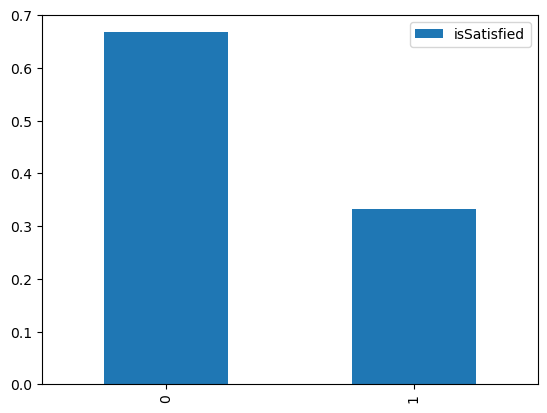

In [12]:
fc = df2['isSatisfied'].value_counts(normalize=True).to_frame()
fc.plot.bar()

In [13]:
df2.groupby(['time_difference','isSatisfied'])['isSatisfied'].count()

time_difference  isSatisfied
0.0              0              1324
                 1               693
1.0              0              6508
                 1              3393
2.0              0              2543
                 1              1556
3.0              0              2551
                 1              1541
4.0              0              1351
                 1               622
5.0              0               697
                 1               360
6.0              0               435
                 1               200
7.0              0               236
                 1               104
8.0              0               211
                 1                98
9.0              0               136
                 1                72
10.0             0                97
                 1                36
11.0             0                65
                 1                38
12.0             0                59
                 1                25
13.0     

In [18]:
df3=df2[df2['time_difference']<=10]

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24764 entries, 0 to 999907
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                24764 non-null  int64  
 1   promise_speed           24764 non-null  float64
 2   shipping_time           24764 non-null  float64
 3   action                  24764 non-null  object 
 4   if_cainiao              24764 non-null  int64  
 5   time_difference         24764 non-null  float64
 6   Logistics_review_score  9114 non-null   float64
 7   isSatisfied             24764 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='time_difference'>

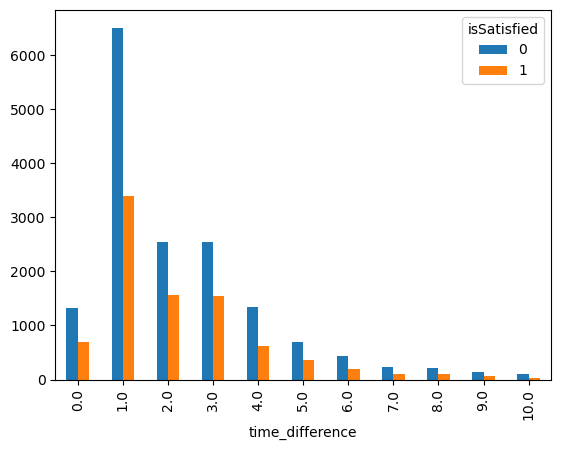

In [20]:
df_gb = df3.groupby(['time_difference','isSatisfied']).size().unstack(level=1)
df_gb.plot(kind = 'bar')

<AxesSubplot:xlabel='shipping_time'>

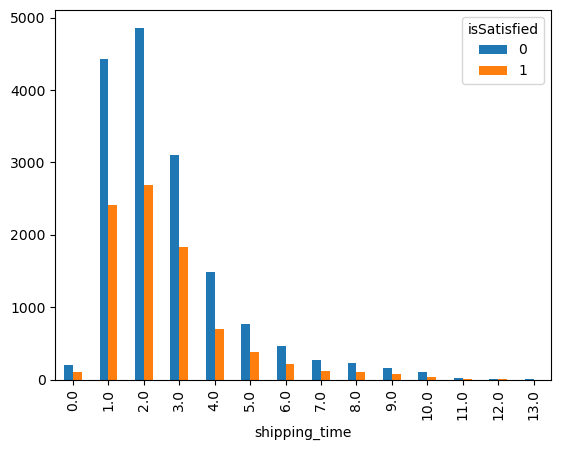

In [21]:
df_gb1 = df3.groupby(['shipping_time','isSatisfied']).size().unstack(level=1)
df_gb1.plot(kind = 'bar')

In [23]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
x=df3[['promise_speed','shipping_time','if_cainiao','time_difference']]
y=df3['isSatisfied']

In [25]:
df2['shipping_time']

0          1.0
10         6.0
22         4.0
35         2.0
42         4.0
          ... 
999947     3.0
999959     2.0
999966     8.0
999987     4.0
999988    15.0
Name: shipping_time, Length: 90999, dtype: float64

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [27]:
X_scaled.shape

(24764, 4)

In [28]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_scaled, y)
print(X_smote.shape, y_smote.shape)


(32178, 4) (32178,)


In [29]:
X_smote

array([[ 0.63348837, -0.89674897,  0.31225061, -0.66207127],
       [ 1.43269903, -0.33886595,  0.31225061, -0.66207127],
       [-0.96493295,  0.77690009,  0.31225061,  0.94260701],
       ...,
       [ 0.63348837, -0.89674897,  0.31225061, -0.66207127],
       [-0.96493295,  4.12419823,  0.31225061,  4.15196357],
       [ 0.63348837, -0.89674897,  0.31225061, -0.66207127]])

In [30]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [31]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid = param_grid,cv=3, verbose=1) 
grid.fit(X_smote, y_smote)
print(grid.best_estimator_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=6,
                       n_estimators=25)


In [32]:
rfc1 = RandomForestClassifier()
grid1 = GridSearchCV(rfc, param_grid = param_grid,cv=3, verbose=1) 
grid1.fit(x, y)
print(grid1.best_estimator_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
RandomForestClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=3,
                       n_estimators=25)


In [33]:
from sklearn.tree import plot_tree

In [16]:
data_sub1 = data_sub1.fillna(0)

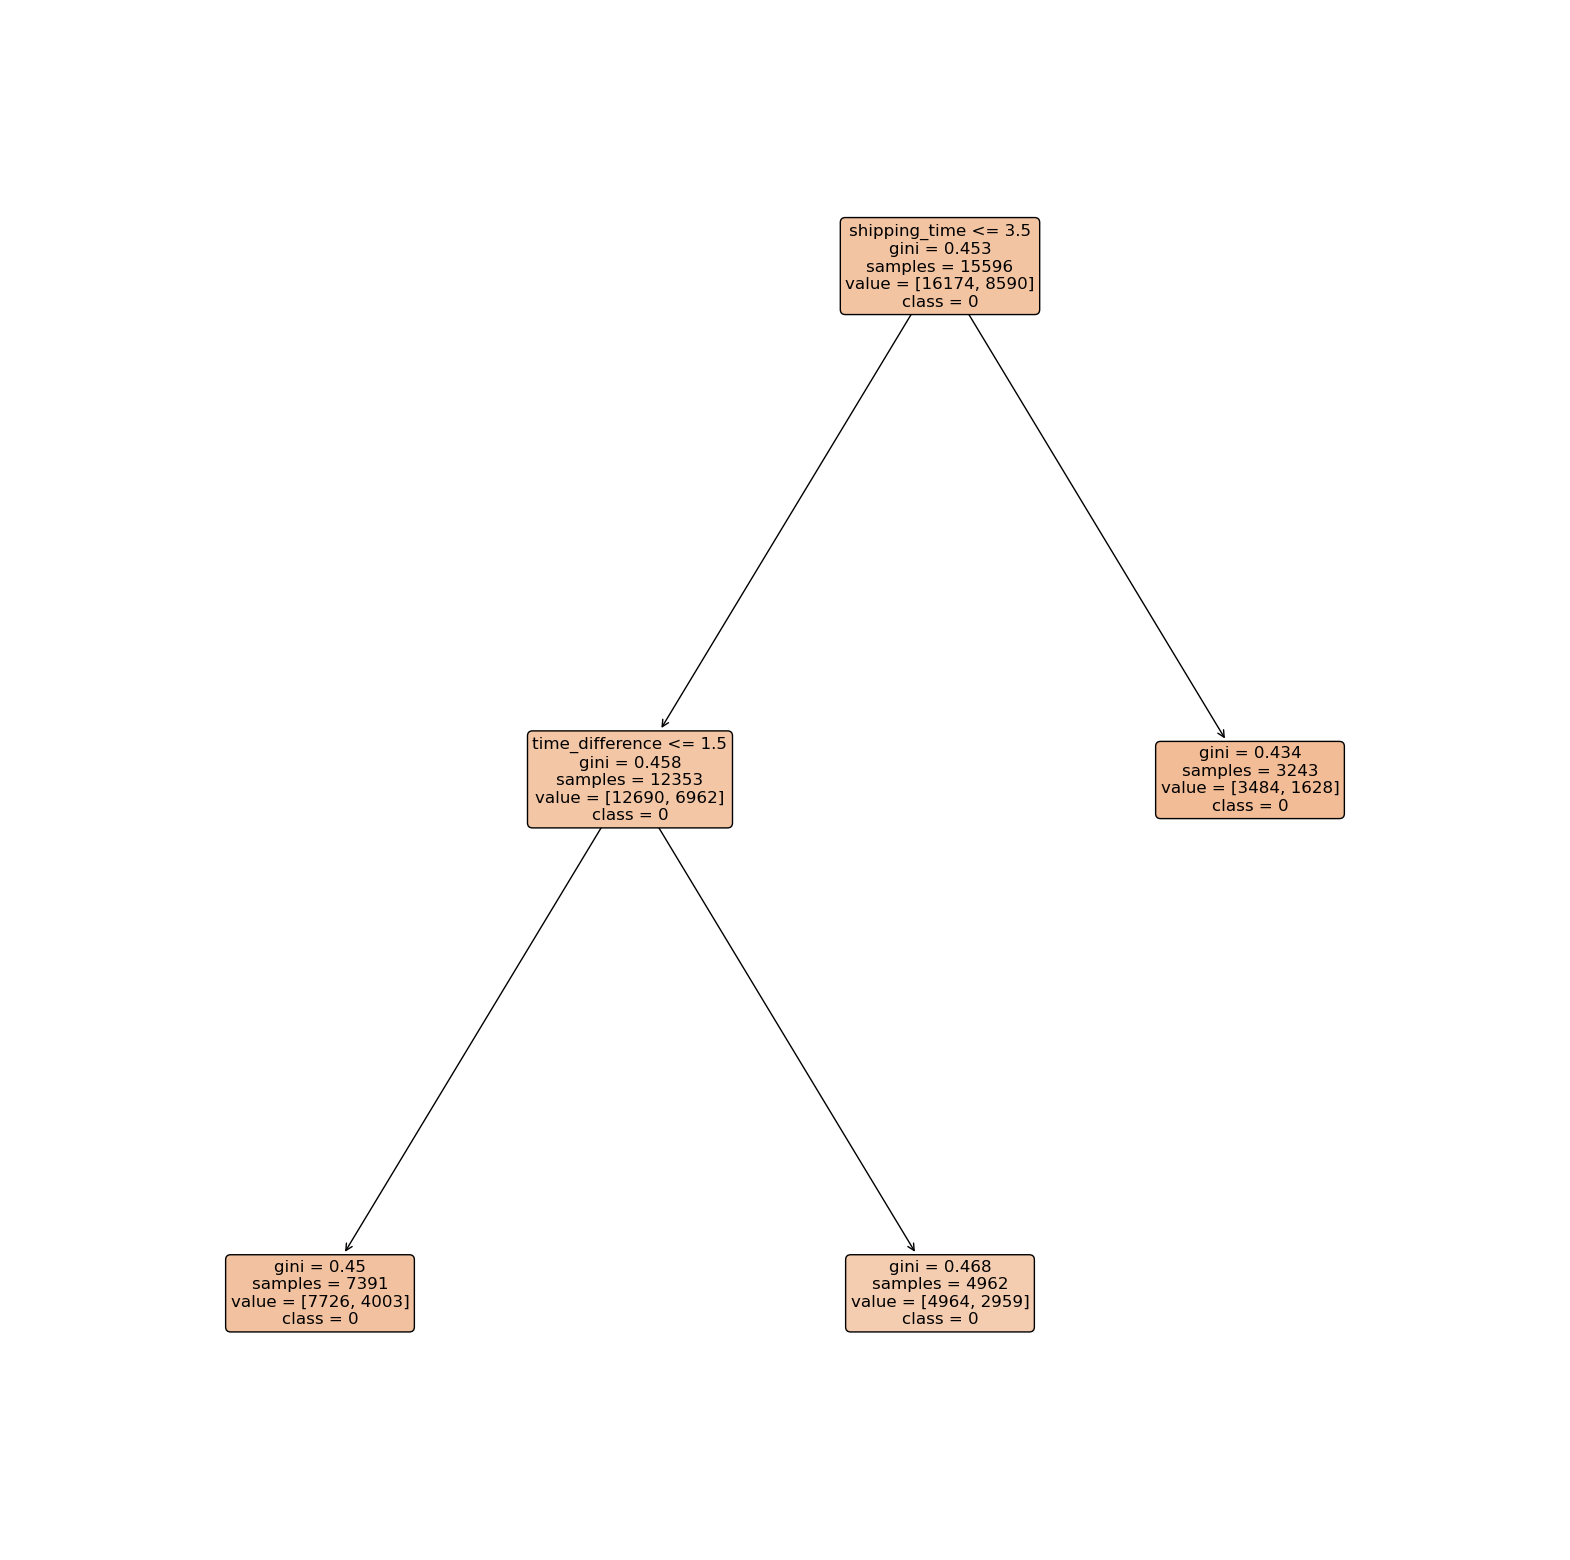

In [34]:
plt.figure(figsize=(20,20))
plot_tree(grid1.best_estimator_[10], 
          feature_names=x.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12)
plt.show()

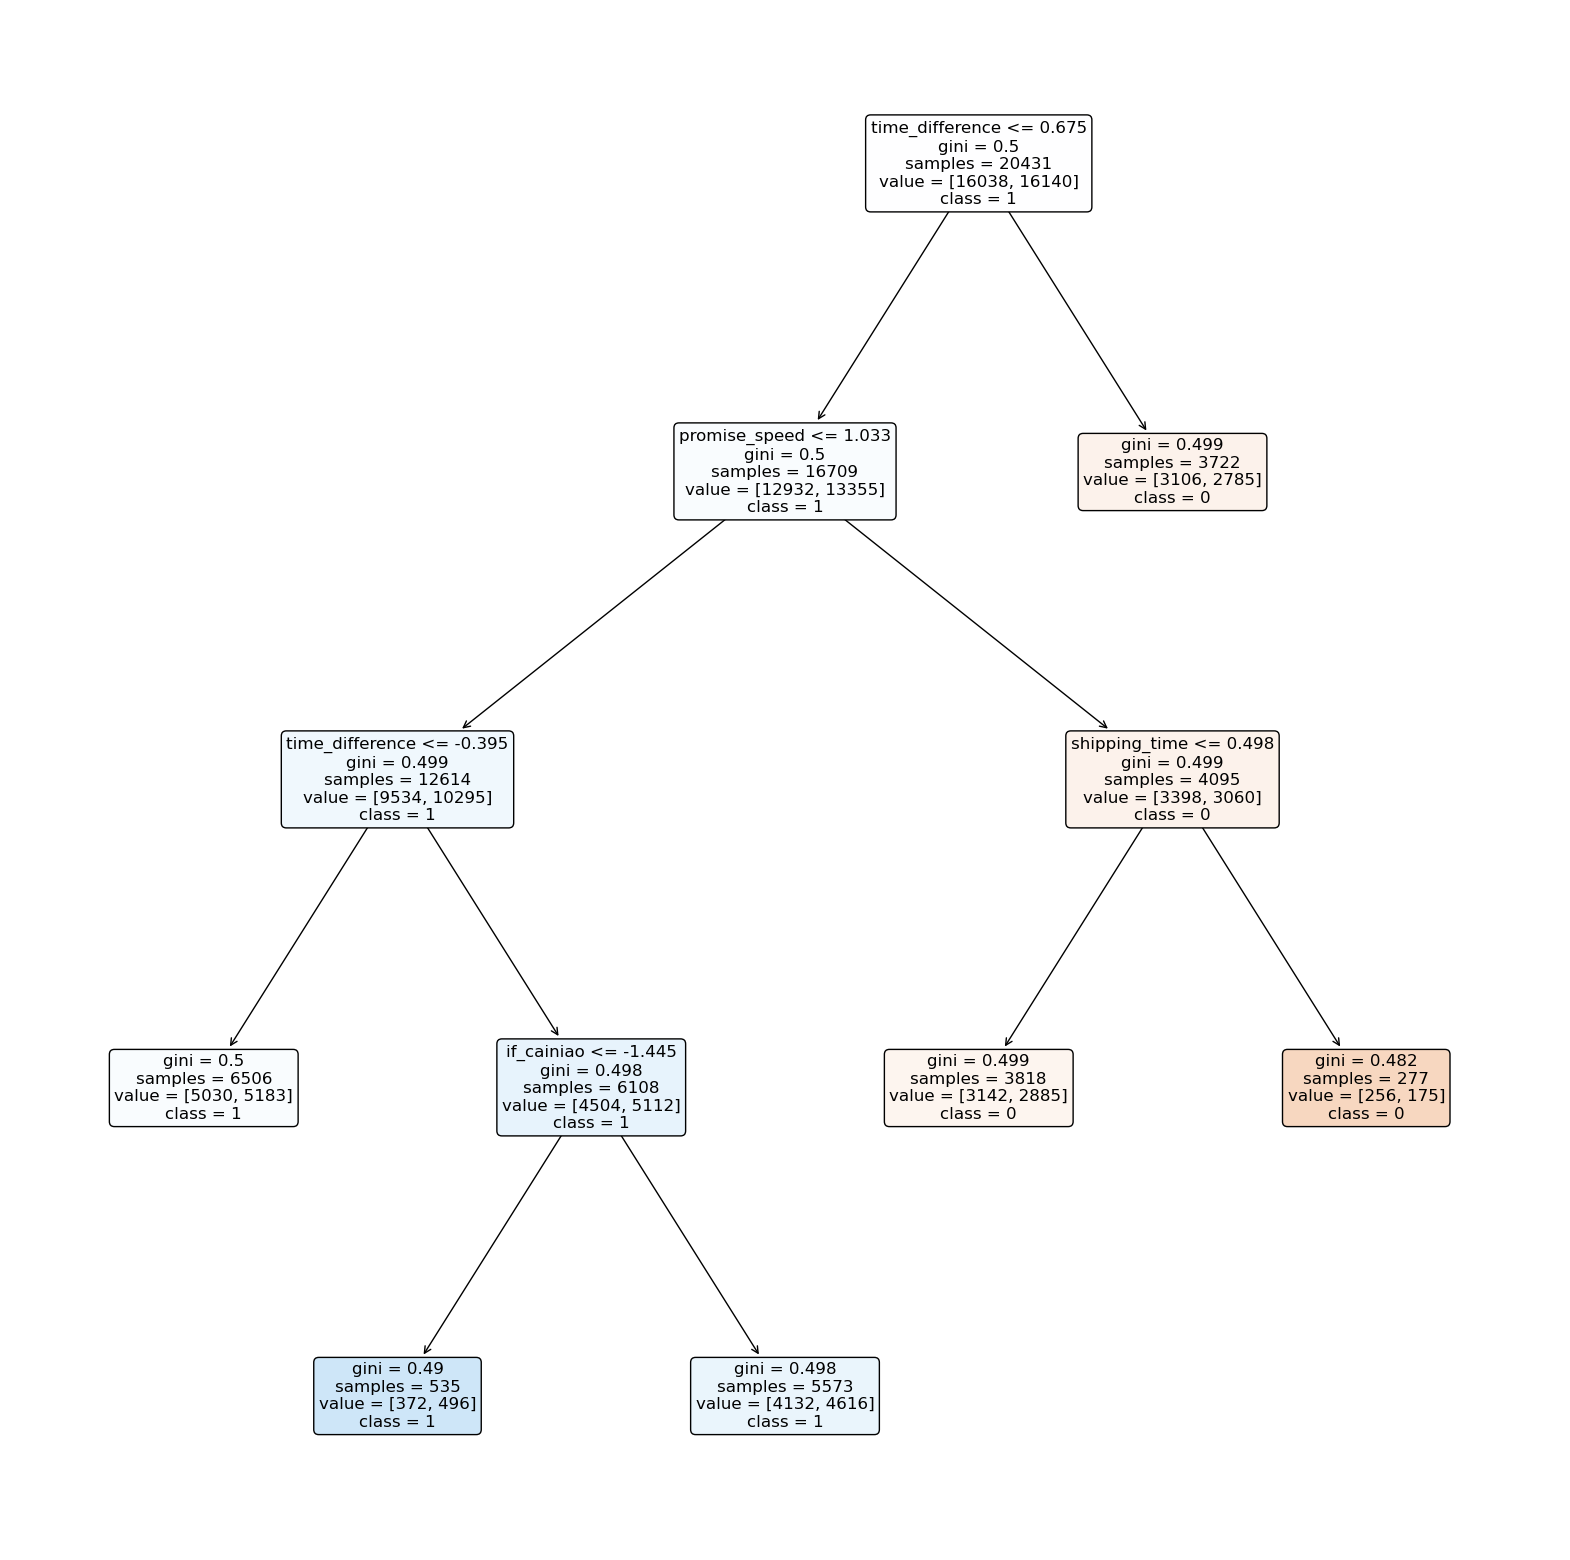

In [35]:
plt.figure(figsize=(20,20))
plot_tree(grid.best_estimator_[0], 
          feature_names=x.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12)
plt.show()

In [36]:
y_predproba = grid.best_estimator_.predict_proba(X_scaled)
print(f'Validation AUC={roc_auc_score(y, y_predproba[:, 1])}')

Validation AUC=0.5308524430836183


In [37]:
y_predproba1 = grid1.best_estimator_.predict_proba(x)
print(f'Validation AUC={roc_auc_score(y, y_predproba1[:, 1])}')

Validation AUC=0.5297599681025019


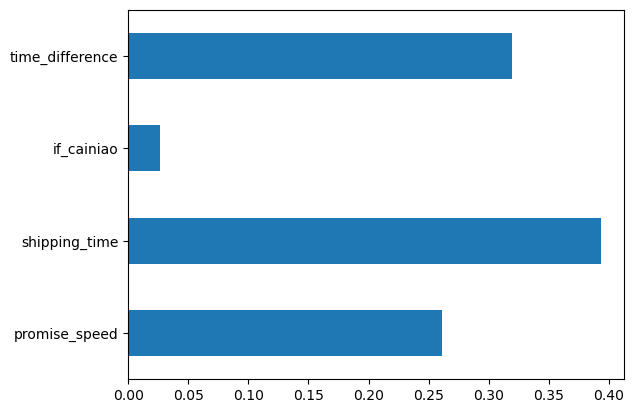

In [38]:
pd.Series(grid.best_estimator_.feature_importances_, index=x.columns).plot(kind='barh')
plt.show()

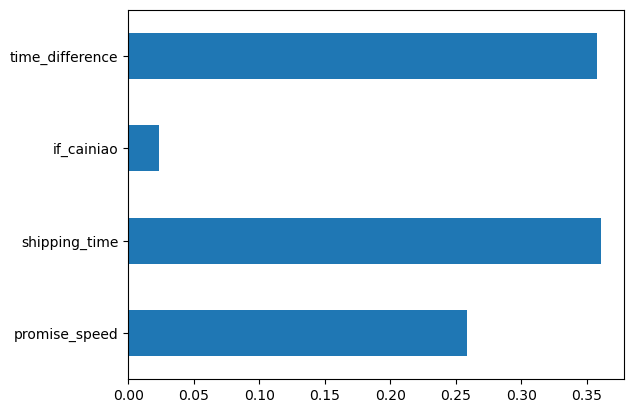

In [39]:
#no smote
pd.Series(grid1.best_estimator_.feature_importances_, index=x.columns).plot(kind='barh')
plt.show()